<a href="https://colab.research.google.com/github/Ayush-Porwal/kaggle-digit-recognizer/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
import numpy as np
from keras.utils import np_utils

In [18]:
train_file_path = '/content/drive/My Drive/Colab Notebooks/kaggle-datasets/digit-recognizer/train.csv'
test_file_path = '/content/drive/My Drive/Colab Notebooks/kaggle-datasets/digit-recognizer/test.csv'

In [19]:
def get_train_test_data(train_file_path, test_file_path):
  
  with open(train_file_path) as train_file:
    train_images = []
    train_labels = []
    
    train_reader = csv.reader(train_file)
    next(train_reader)
    
    for row in train_reader:
      train_labels.append(row[0])
      train_images.append(np.array(row[1:]).reshape(28,28))
  
  with open(test_file_path) as test_file:
    test_images = []
    test_labels = []

    test_reader = csv.reader(test_file)
    next(test_reader)

    for row in test_reader:
      test_images.append(np.array(row[0:]).reshape(28,28))
  
  return np.array(train_images).astype(float)/255, np.array(train_labels).astype(float), np.array(test_images).astype(float)/255

In [20]:
train_images, train_labels, test_images = get_train_test_data(train_file_path, test_file_path)
train_labels = np_utils.to_categorical(train_labels)
train_images = np.expand_dims(train_images, axis = 3)
test_images = np.expand_dims(test_images, axis = 3)

print(f'The shape of train_images is: {train_images.shape}')
print(f'The shape of train_labels is: {train_labels.shape}')
print(f'The shape of test_images is: {test_images.shape}')

The shape of train_images is: (42000, 28, 28, 1)
The shape of train_labels is: (42000, 10)
The shape of test_images is: (28000, 28, 28, 1)


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                25664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [28]:
history = model.fit(train_images, train_labels, epochs = 30, validation_split = 0.1, verbose = 1)

Epoch 1/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.0644 - val_accuracy: 0.9876
Epoch 2/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0064 - accuracy: 0.9976 - val_loss: 0.0755 - val_accuracy: 0.9881
Epoch 3/30
1182/1182 [==============================] - 28s 24ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0678 - val_accuracy: 0.9888
Epoch 4/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0625 - val_accuracy: 0.9895
Epoch 5/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0788 - val_accuracy: 0.9869
Epoch 6/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0584 - val_accuracy: 0.9883
Epoch 7/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0819 -

Text(0, 0.5, 'Accuracy')

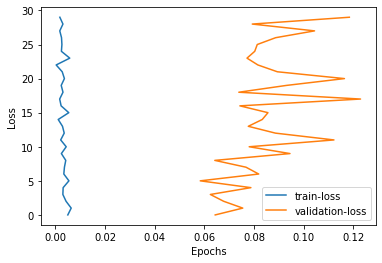

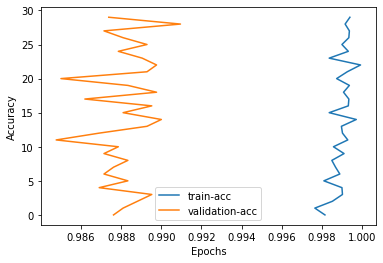

In [32]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(train_loss, range(len(train_loss)), '-', label = 'train-loss')
plt.plot(val_loss, range(len(val_loss)), '-', label = 'validation-loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(train_acc, range(len(train_acc)), '-', label = 'train-acc')
plt.plot(val_acc, range(len(val_acc)), '-', label = 'validation-acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [33]:
import pandas as pd
results = model.predict(test_images)
results = np.argmax(results, axis = 1)

results = pd.Series(results, name = 'Label')
submission = pd.concat([pd.Series(range(1,28001), name = 'ImageId'), results], axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


30


In [34]:
submission.to_csv('submission.csv', index=False)